In [1]:
%matplotlib inline
import numpy as np
import os
import matplotlib.pyplot as plt
import cPickle as pickle
import gzip
from photutils import CircularAnnulus
from photutils import CircularAperture
from photutils import aperture_photometry


In [69]:
# SPIRE channels
lambdas = [250, 350, 500]
psf     = {250:17.8, 350:24.0, 500:35.2} # in arcsec 
factor  = {250:469./36., 350:831./64., 500:1804./144.} # Jy/beam -> Jy/pixel 
reso    = {250:6., 350:8., 500:12.} # in arcsec 
positions = {250: (25.5, 25.5), 350: (19.5,19.5), 500:(13.5,13.5)}
boxsize = {250:51, 350:39, 500:27}

# H-ATLAS patches
patches = ['G9', 'G12', 'G15']#, 'NGP', 'SGP']

# Results folder
results_folder = 'results/'

zmin = 0.1
zmax = 5.

In [3]:
bkd = {}
sims = {}
for lambda_ in lambdas:
    bkd[lambda_] = {}
    sims[lambda_] = {}
    # Loop over patches
    for patch in patches:
            sims_ = pickle.load(gzip.open(results_folder + '/patch'+patch+'_lambda'+str(lambda_)+'_zmin'+str(zmin)+'_zmax'+str(zmax)+'.pkl','rb'))
            sims[lambda_][patch] = np.asarray(sims_['maps'])
            bkd_ = pickle.load(gzip.open(results_folder + '/patch'+patch+'_lambda'+str(lambda_)+'_zmin'+str(zmin)+'_zmax'+str(zmax)+'_RND.pkl','rb'))
            bkd[lambda_][patch] = bkd_['maps']

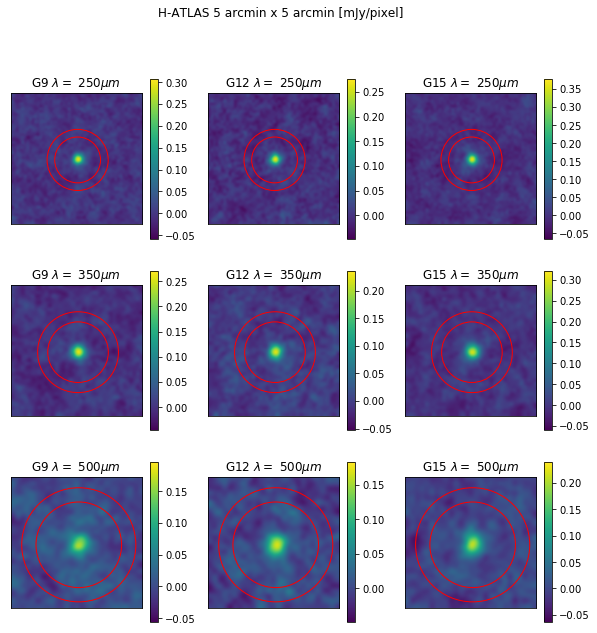

In [70]:
def do_thumbnails_plot(remove_max=0):
    fig = plt.figure(figsize=(10,10))
    i=1
    plt.suptitle('H-ATLAS 5 arcmin x 5 arcmin [mJy/pixel]')
    for lambda_ in lambdas:
        for patch in patches:
#             plt.subplot(3,3,i)
            ax = fig.add_subplot(3, 3, i)
            plt.title(patch + r' $\lambda= $ ' +str(lambda_) + r'$\mu m$')
            simuls = sims[lambda_][patch].copy()
#             if remove_max != 0:
#                 i = 0
#                 while i <= remove_max:
#                     simuls = np.delete(simuls, np.argmax(np.mean(simuls, axis=(1,2))), axis=0)
#                     i += 1
            simuls = np.delete(simuls, np.argmax(np.mean(simuls, axis=(1,2))), axis=0)
            simuls = np.delete(simuls, np.argmax(np.mean(simuls, axis=(1,2))), axis=0)
            simuls = np.delete(simuls, np.argmax(np.mean(simuls, axis=(1,2))), axis=0)
            simuls = np.delete(simuls, np.argmax(np.mean(simuls, axis=(1,2))), axis=0)
            simuls = np.delete(simuls, np.argmax(np.mean(simuls, axis=(1,2))), axis=0)
            simuls = np.delete(simuls, np.argmax(np.mean(simuls, axis=(1,2))), axis=0)
            simuls = np.delete(simuls, np.argmax(np.mean(simuls, axis=(1,2))), axis=0)
            simuls = np.delete(simuls, np.argmax(np.mean(simuls, axis=(1,2))), axis=0)
            simuls = np.delete(simuls, np.argmax(np.mean(simuls, axis=(1,2))), axis=0)

            simuls = simuls.mean(axis=0) - bkd[lambda_][patch].mean()
            plt.imshow(simuls/(factor[lambda_])/1e-3, interpolation='bicubic')
            
            circin = plt.Circle(positions[lambda_], radius=3*psf[lambda_]/reso[lambda_], color='r', fill=False)
            circout = plt.Circle(positions[lambda_], radius=4*psf[lambda_]/reso[lambda_], color='r', fill=False)
#             ax.add_patch(circ)
            ax.add_patch(circin)
            ax.add_patch(circout)

            plt.colorbar()
#             plt.plot(positions[lambda_], 'w+', mew=2.)
            frame1 = plt.gca()
            frame1.axes.get_xaxis().set_visible(False)
            frame1.axes.get_yaxis().set_visible(False)
            i += 1
    plt.show()
    
do_thumbnails_plot(remove_max=1)

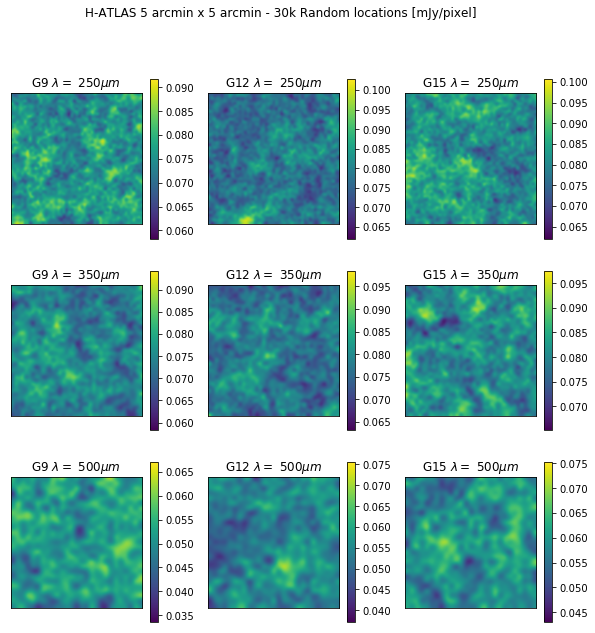

In [8]:
fig = plt.figure(figsize=(10,10))
i=1
plt.suptitle('H-ATLAS 5 arcmin x 5 arcmin - 30k Random locations [mJy/pixel]')
for lambda_ in lambdas:
    for patch in patches:
        plt.subplot(3,3,i)
        plt.title(patch + r' $\lambda= $ ' +str(lambda_) + r'$\mu m$')
        plt.imshow(bkd[lambda_][patch]/factor[lambda_]/1e-3, interpolation='bicubic')
        plt.colorbar()
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
        i += 1
plt.show()

In [9]:
print 'lambda', patch, 'N_obj'
for lambda_ in lambdas:
    for patch in patches:
        print lambda_, patch, sims[lambda_][patch].shape[0]

lambda G15 N_obj
250 G9 3127
250 G12 2926
250 G15 2623
350 G9 3116
350 G12 2925
350 G15 2621
500 G9 3110
500 G12 2905
500 G15 2610


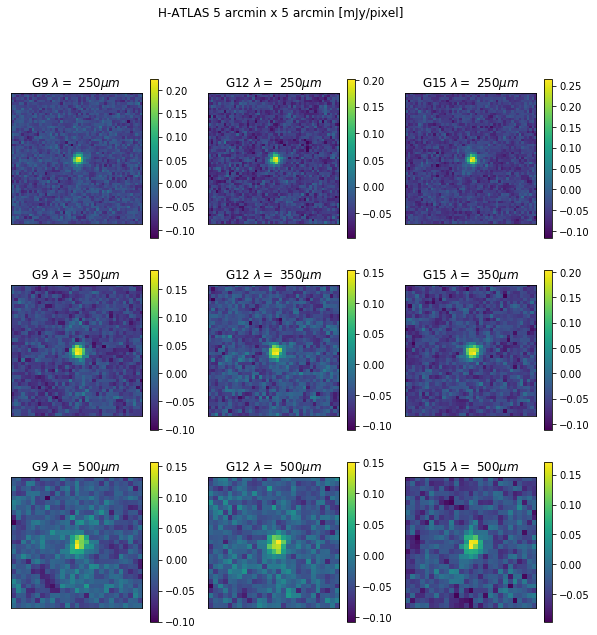

In [10]:
fig = plt.figure(figsize=(10,10))
i=1
plt.suptitle('H-ATLAS 5 arcmin x 5 arcmin [mJy/pixel]')
for lambda_ in lambdas:
    for patch in patches:
        plt.subplot(3,3,i)
        plt.title(patch + r' $\lambda= $ ' +str(lambda_) + r'$\mu m$')
#         plt.imshow((sims[lambda_][patch].mean(axis=0))/(factor[lambda_])/1e-3)
        plt.imshow(np.median(sims[lambda_][patch]-bkd[lambda_][patch].mean(), axis=0)/(factor[lambda_])/1e-3)
        plt.colorbar()
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
        i += 1
plt.show()

2489


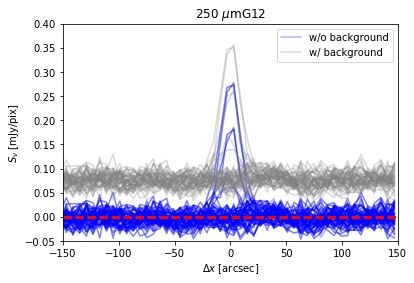

In [11]:
def plot_slice(lambda_, patch, remove_max=True):
    simuls = sims[lambda_][patch].copy()
    if remove_max:
        print np.argmax(np.mean(simuls,axis=(1,2)))
        simuls = np.delete(simuls, np.argmax(np.mean(simuls, axis=(1,2))), axis=0)
        simuls = np.delete(simuls, np.argmax(np.mean(simuls, axis=(1,2))), axis=0)
        simuls = np.delete(simuls, np.argmax(np.mean(simuls, axis=(1,2))), axis=0)
        simuls = np.delete(simuls, np.argmax(np.mean(simuls, axis=(1,2))), axis=0)

    for i in xrange(boxsize[lambda_]):
        if i == 10:
            plt.plot(reso[lambda_]*(np.arange(boxsize[lambda_])-positions[lambda_][0]), (simuls.mean(axis=0)-bkd[lambda_][patch].mean())[i,:]/(factor[lambda_])/1e-3, color='blue', alpha=0.3, label='w/o background')
        else:
            plt.plot(reso[lambda_]*(np.arange(boxsize[lambda_])-positions[lambda_][0]), (simuls.mean(axis=0)-bkd[lambda_][patch].mean())[i,:]/(factor[lambda_])/1e-3, color='blue', alpha=0.5)#, label='w/ background')

    for i in xrange(boxsize[lambda_]):
        if i == 10:
            plt.plot(reso[lambda_]*(np.arange(boxsize[lambda_])-positions[lambda_][0]), (simuls.mean(axis=0))[i,:]/(factor[lambda_])/1e-3, color='grey', alpha=0.3, label='w/ background')
        else:
            plt.plot(reso[lambda_]*(np.arange(boxsize[lambda_])-positions[lambda_][0]), (simuls.mean(axis=0))[i,:]/(factor[lambda_])/1e-3, color='grey', alpha=0.3)#, label='w/ background')
    plt.axhline(ls='--',lw=3, color='r')
    plt.title(str(lambda_) + r' $\mu$m' + patch)
    plt.legend(loc='best')
    plt.xlabel(r'$\Delta x$ [arcsec]')
    plt.ylabel(r'$S_{\nu}$ [mJy/pix]')
    plt.ylim([-0.05,0.4])
    plt.xlim([-2.5*60.,2.5*60])
    
plot_slice(250, 'G12')

871
2489
858
2281
2488
2571
2275
2470
2560


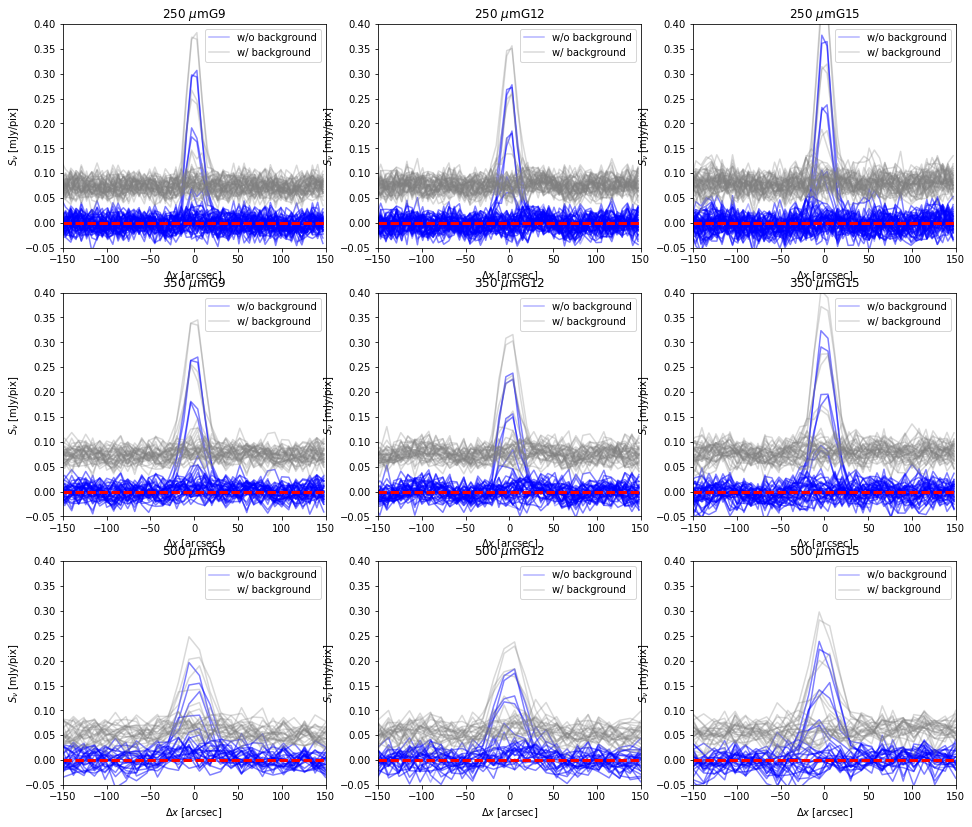

In [13]:
fig = plt.figure(figsize=(16,14))
j = 1
for lambda_ in lambdas:
    for patch in patches:
        plt.subplot(3,3,j)
        plot_slice(lambda_, patch)
        j+=1

 250 G9 0.00098893
250 G12 0.00102026
250 G15 0.00106867
350 G9 0.000970692
350 G12 0.00100612
350 G15 0.00105368
500 G9 0.000649428
500 G12 0.000682369
500 G15 0.000740495


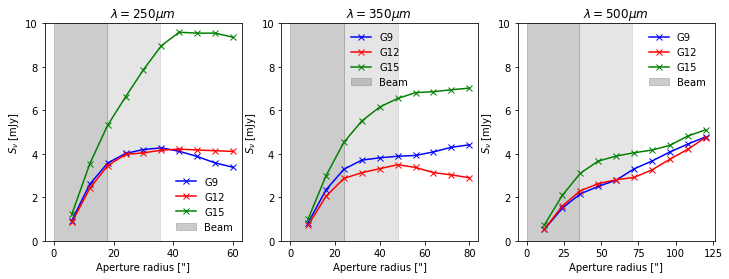

In [15]:
ph_mean = []
cols = {'G9':'b', 'G12':'r', 'G15':'g'}
j=1
fig = plt.figure(figsize=(12,4))
for lambda_ in lambdas:
    plt.subplot(1,3,j)
    plt.title(r'$\lambda=%d \mu m$ ' %lambda_)
    for patch in patches:
        print lambda_, patch, bkd[lambda_][patch].mean()
        for i in xrange(1,11):
            apertures = CircularAperture(positions[lambda_], r=i)
            mean_ = (sims[lambda_][patch].mean(axis=0)-bkd[lambda_][patch].mean())
            phot_table = aperture_photometry(mean_/(factor[lambda_])/1e-3, apertures)
            ph_mean.append(phot_table.field('aperture_sum')[0])
        plt.plot(reso[lambda_]*np.arange(1,11), ph_mean,'-x', label=patch, color=cols[patch])
        ph_mean = []
        ph_median = []
    plt.axvspan(0, psf[lambda_], alpha=0.4, color='grey', label=r'Beam')
    plt.axvspan(psf[lambda_], 2*psf[lambda_], alpha=0.2, color='grey')
    plt.legend(frameon=False)
    plt.ylim([0,10])
#     plt.xlim([0,130])
    plt.xlabel('Aperture radius ["]')
    plt.ylabel(r'$S_{\nu}$ [mJy]')
    j=j+1

In [16]:
from astropy.modeling import models, fitting

<Gaussian2D(amplitude=0.003901694011641665, x_mean=25.503222226514637, y_mean=25.506013367443497, x_stddev=1.4997898863904657, y_stddev=1.4148418737003525, theta=-0.5883361769868729)>

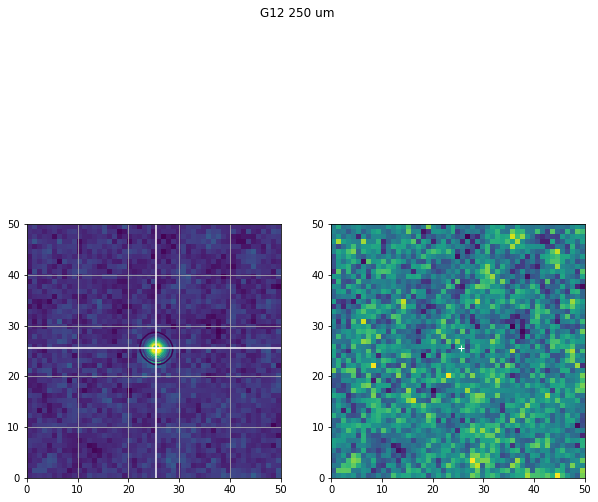

In [19]:
g12 = sims[250]['G12'].copy()
g12= np.delete(g12, 2489, axis=0)

data = g12.mean(axis=0) - bkd[250]['G12'].mean()#sims[500]['G12'].mean(axis=0)-mean[500]['G12'].mean()

# data = sims[250]['G12'].mean(axis=0)-mean[250]['G12'].mean()
y, x = np.meshgrid(np.arange(data.shape[0]), np.arange(data.shape[1]))
p_init = models.Gaussian2D(amplitude=np.max(data), x_mean=25, y_mean=25, x_stddev=1, y_stddev=1)
fit_p = fitting.LevMarLSQFitter()
p = fit_p(p_init, x, y, data)

plt.figure(figsize=(10,10))
plt.suptitle('G12 250 um')
plt.subplot(121)
plt.imshow(data,extent=[0,50,0,50])
plt.contour(p(y,x), 10)
plt.plot(25+.5,25+.5, 'w+', mew=1.)
plt.grid()
plt.axhline(25.5,color='w')
plt.axvline(25.5,color='w')
plt.subplot(122)
plt.imshow(data-p(y,x),extent=[0,50,0,50])
plt.plot(25+.5,25+.5, 'w+', mew=1.)
# plt.colorbar()
p

<Gaussian2D(amplitude=0.2615898248542388, x_mean=19.571736794805535, y_mean=19.537403706459724, x_stddev=1.4944630095505897, y_stddev=1.3202685036652377, theta=-0.10057919735676808)>

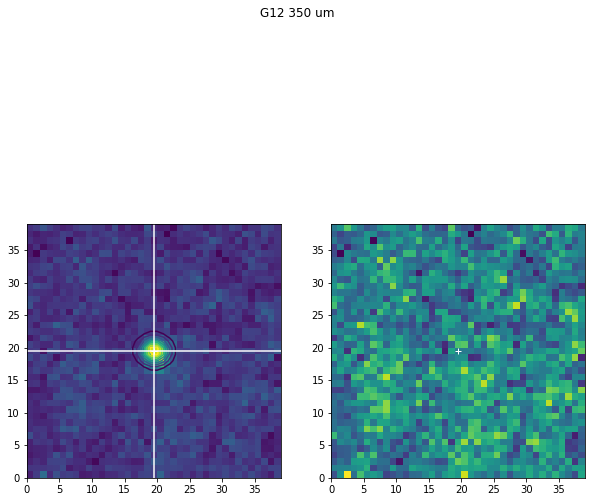

In [20]:
g12 = sims[350]['G12'].copy()
g12= np.delete(g12, 2488, axis=0)

data = g12.mean(axis=0) - bkd[350]['G12'].mean()#sims[500]['G12'].mean(axis=0)-mean[500]['G12'].mean()
data = data/factor[350]/1e-3
y, x = np.meshgrid(np.arange(data.shape[0]), np.arange(data.shape[1]))
p_init = models.Gaussian2D(amplitude=np.max(data), x_mean=19, y_mean=19, x_stddev=1, y_stddev=1)
fit_p = fitting.LevMarLSQFitter()
p = fit_p(p_init, x, y, data)

plt.figure(figsize=(10,10))

plt.suptitle('G12 350 um')
plt.subplot(121)
plt.imshow(data,extent=[0,39,0,39])
plt.contour(p(y,x), 10)
plt.plot(19+.5,19+.5, 'w+', mew=1.)
plt.axhline(19.5,color='w')
plt.axvline(19.5,color='w')
# plt.grid()
plt.subplot(122)
plt.imshow(data-p(y,x),extent=[0,39,0,39])
plt.plot(19+.5,19+.5, 'w+', mew=1.)
plt.xlim([0,39])
plt.ylim([0,39])
# plt.grid()
# plt.colorbar()
p

<Gaussian2D(amplitude=0.002444256531805364, x_mean=13.685064131576304, y_mean=13.495028689055031, x_stddev=1.6084207552603658, y_stddev=1.3681310590643678, theta=-0.2365424028329995)>

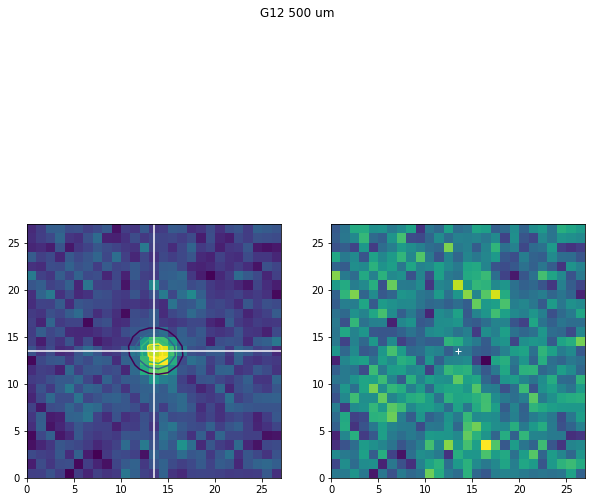

In [21]:
g12 = sims[500]['G12'].copy()
g12= np.delete(g12, np.argmax(np.mean(sims[500]['G12'],axis=(1,2))), axis=0)

data = g12.mean(axis=0) - bkd[500]['G12'].mean()#sims[500]['G12'].mean(axis=0)-mean[500]['G12'].mean()
y, x = np.meshgrid(np.arange(data.shape[0]), np.arange(data.shape[1]))
p_init = models.Gaussian2D(amplitude=np.max(data), x_mean=13, y_mean=13, x_stddev=1, y_stddev=1)
fit_p = fitting.LevMarLSQFitter()
p = fit_p(p_init, x, y, data)

plt.figure(figsize=(10,10))

plt.suptitle('G12 500 um')
plt.subplot(121)
plt.imshow(data,extent=[0,27,0,27])
plt.contour(p(y,x), 4)
plt.plot(13+.5,13+.5, 'w+', mew=1.)
# plt.grid()
# plt.colorbar()
plt.axhline(13.5,color='w')
plt.axvline(13.5,color='w')
plt.subplot(122)
plt.imshow(data-p(y,x),extent=[0,27,0,27])
plt.xlim([0,27])
plt.ylim([0,27])
plt.plot(13+.5,13+.5, 'w+', mew=1.)
# plt.grid()
# plt.colorbar()
p

In [22]:
np.diag(fit_p.fit_info['param_cov'])**.5

array([  7.24281375e-04,   4.72975076e-01,   4.09632153e-01,
         4.76602622e-01,   4.05407308e-01,   1.28940295e+00])

In [195]:
np.argmax(np.mean(sims[250]['G12'],axis=(1,2)))


2489

In [56]:
g12 = sims[250]['G15'].copy()
g12= np.delete(g12, 2489, axis=0)
g12.shape

(2925, 51, 51)

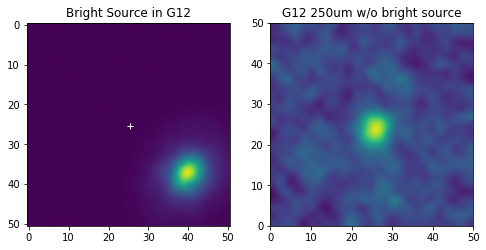

In [25]:
plt.figure(figsize=(8,8))
plt.subplot(121)
plt.plot(25+.5,25+.5, 'w+', mew=1.)
plt.title('Bright Source in G12')
plt.imshow(sims[250]['G12'][2489], interpolation='bicubic')
plt.subplot(122)
plt.title('G12 250um w/o bright source')
plt.imshow(g12.mean(axis=0)-bkd[250]['G12'].mean(),extent=[0,50,0,50], interpolation='bicubic')

In [26]:
def GaussFit(lambda_, patch, remove_mean=True, remove_max=0):
    simuls = sims[lambda_][patch].copy()
    if remove_max > 0:
        for i in xrange(remove_max):
            simuls = np.delete(simuls, np.argmax(np.mean(simuls, axis=(1,2))), axis=0)

    if remove_mean:
        data = simuls.mean(axis=0) - bkd[lambda_][patch].mean()#sims[500]['G12'].mean(axis=0)-mean[500]['G12'].mean()
    else:
        data = simuls.mean(axis=0)
    
    y, x = np.meshgrid(np.arange(data.shape[0]), np.arange(data.shape[1]))
    p_init = models.Gaussian2D(amplitude=np.max(data), x_mean=data.shape[0]/2, y_mean=data.shape[0]/2, x_stddev=1, y_stddev=1)
    fit_p = fitting.LevMarLSQFitter()
    p = fit_p(p_init, x, y, data)

    return p

GaussFit(350,'G15', remove_mean=True, remove_max=10)


<Gaussian2D(amplitude=0.004348509078062267, x_mean=19.53213906382213, y_mean=19.45821285334637, x_stddev=1.5369995058833354, y_stddev=1.4424410895108908, theta=-0.11802536697831331)>

 250 G9 0.00098893
250 G12 0.00102026
250 G15 0.00106867
350 G9 0.000970692
350 G12 0.00100612
350 G15 0.00105368
500 G9 0.000649428
500 G12 0.000682369
500 G15 0.000740495


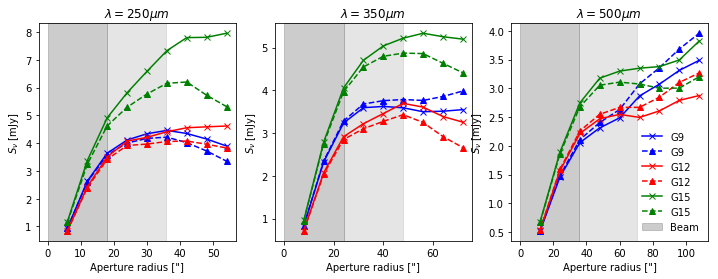

In [28]:
def GetPhotometryFromStacks(lambda_, patch, r, r_in=None, r_out=None, remove_mean=True, remove_max=0):
    simuls = sims[lambda_][patch].copy()
    if remove_max > 0:
        for i in xrange(remove_max):
            simuls = np.delete(simuls, np.argmax(np.mean(simuls, axis=(1,2))), axis=0)
       
    if (r_in is None) or (r_out is None):
        apertures = CircularAperture(positions[lambda_], r=r)
        if remove_mean:
            stacked_map = (simuls.mean(axis=0) - bkd[lambda_][patch].mean())
        else:
            stacked_map = simuls.mean(axis=0)
        phot_table = aperture_photometry(stacked_map/(factor[lambda_])/1e-3, apertures)
    else:
        apertures = CircularAperture(positions[lambda_], r=r)
        annulus_apertures = CircularAnnulus(positions[lambda_], r_in=r_in, r_out=r_out)
        apers = [apertures, annulus_apertures]
        if remove_mean:
            stacked_map = (simuls.mean(axis=0) - bkd[lambda_][patch].mean())
        else:
            stacked_map = simuls.mean(axis=0)
        phot_table = aperture_photometry(stacked_map/(factor[lambda_])/1e-3, apers)  
        bkg_mean = phot_table['aperture_sum_1'] / annulus_apertures.area()
        bkg_sum = bkg_mean * apertures.area()
        final_sum = phot_table['aperture_sum_0'] - bkg_sum
        phot_table['aperture_sum'] = final_sum
    return phot_table.field('aperture_sum')[0]

rmax = 9

ph_mean = []
ph_mean2 = []
cols = {'G9':'b', 'G12':'r', 'G15':'g'}
j=1
fig = plt.figure(figsize=(12,4))
for lambda_ in lambdas:
    plt.subplot(1,3,j)
    plt.title(r'$\lambda=%d \mu m$ ' %lambda_)
    for patch in patches:
        print lambda_, patch, bkd[lambda_][patch].mean()
        for i in xrange(1,rmax+1):
            ph_mean.append(GetPhotometryFromStacks(lambda_, patch, i, r_in=3*psf[lambda_]/reso[lambda_], r_out=4*psf[lambda_]/reso[lambda_], remove_mean=False, remove_max=10))
            ph_mean2.append(GetPhotometryFromStacks(lambda_, patch, i, remove_mean=True, remove_max=10))
#             ph_mean2.append(GetPhotometryFromStacks(lambda_, patch, i, r_in=10, r_out=13, remove_mean=False, remove_max=False))
        plt.plot(reso[lambda_]*np.arange(1,rmax+1), ph_mean,'-x', label=patch, color=cols[patch])
        plt.plot(reso[lambda_]*np.arange(1,rmax+1), ph_mean2,'--^', label=patch, color=cols[patch])
        ph_mean = []
        ph_mean2 = []
    plt.axvspan(0, psf[lambda_], alpha=0.4, color='grey', label=r'Beam')
    plt.axvspan(psf[lambda_], 2*psf[lambda_], alpha=0.2, color='grey')
#     plt.ylim([0,12])
#     plt.xlim([0,100])
    plt.xlabel('Aperture radius ["]')
    plt.ylabel(r'$S_{\nu}$ [mJy]')
    j=j+1
plt.legend(loc='best',frameon=False)
    

# def GetPhotometryFromMaps(lambda_, patch, r, r_in, r_out):


 250 G9 0.00098893
250 G12 0.00102026
250 G15 0.00106867
350 G9 0.000970692
350 G12 0.00100612
350 G15 0.00105368
500 G9 0.000649428
500 G12 0.000682369
500 G15 0.000740495


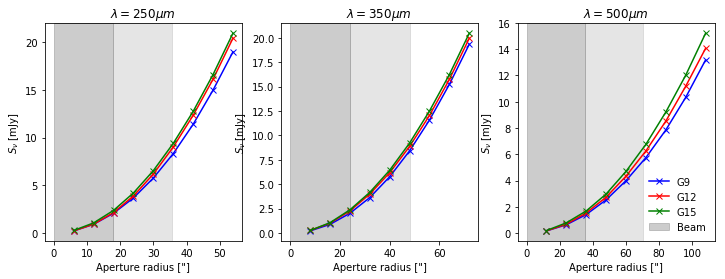

In [30]:
def GetPhotometryFromStacksBKD(lambda_, patch, r, remove_max=False):
    stacked_map = bkd[lambda_][patch].copy()
#     if remove_max:
#     stacked_map = np.delete(stacked_map, np.argmax(np.mean(stacked_map, axis=(1,2))), axis=0)
    
    apertures = CircularAperture(positions[lambda_], r=r)
    phot_table = aperture_photometry(stacked_map/(factor[lambda_])/1e-3, apertures)

    return phot_table.field('aperture_sum')[0]


j=1
fig = plt.figure(figsize=(12,4))
for lambda_ in lambdas:
    plt.subplot(1,3,j)
    plt.title(r'$\lambda=%d \mu m$ ' %lambda_)
    for patch in patches:
        print lambda_, patch, bkd[lambda_][patch].mean()
        for i in xrange(1,10):
            ph_mean.append(GetPhotometryFromStacksBKD(lambda_, patch, r=i))#, remove_max=True))
#             ph_mean2.append(GetPhotometryFromStacksBKD(lambda_, patch, r=i))#, remove_max=False))
        plt.plot(reso[lambda_]*np.arange(1,10), ph_mean,'-x', label=patch, color=cols[patch])
#         plt.plot(reso[lambda_]*np.arange(1,10), ph_mean2,'--^', label=patch, color=cols[patch])
        ph_mean = []
        ph_mean2 = []
    plt.axvspan(0, psf[lambda_], alpha=0.4, color='grey', label=r'Beam')
    plt.axvspan(psf[lambda_], 2*psf[lambda_], alpha=0.2, color='grey')
#     plt.ylim([0,12])
#     plt.xlim([0,100])
    plt.xlabel('Aperture radius ["]')
    plt.ylabel(r'$S_{\nu}$ [mJy]')
    j=j+1
plt.legend(loc='best',frameon=False)

In [31]:
def GetTotPhotometryFromStacks(lambda_, r, r_in=None, r_out=None, remove_mean=True, remove_max=0):
    simuls = {}
    for patch in patches:
        simuls[patch] = sims[lambda_][patch].copy()
        
    if remove_max > 0:
        for patch in patches:
            for i in xrange(remove_max):
                simuls[patch] = np.delete(simuls[patch], np.argmax(np.mean(simuls[patch], axis=(1,2))), axis=0)

    if (r_in is None) or (r_out is None):
        apertures = CircularAperture(positions[lambda_], r=r)
        if remove_mean:
            stacked_map = np.concatenate([simuls[patch].copy() - bkd[lambda_][patch].mean() for patch in patches], axis=0).mean(0)
#           stacked_map = (simuls.mean(axis=0) - bkd[lambda_][patch].mean())
        else:
#             stacked_map = simuls.mean(axis=0)
            stacked_map = np.concatenate([simuls[patch].copy() for patch in patches], axis=0).mean(0)

        phot_table = aperture_photometry(stacked_map/(factor[lambda_])/1e-3, apertures)
    else:
        apertures = CircularAperture(positions[lambda_], r=r)
        annulus_apertures = CircularAnnulus(positions[lambda_], r_in=r_in, r_out=r_out)
        apers = [apertures, annulus_apertures]
        if remove_mean:
            stacked_map = np.concatenate([simuls[patch].copy() - bkd[lambda_][patch].mean() for patch in patches], axis=0).mean(0)
        else:
            stacked_map = np.concatenate([simuls[patch].copy() for patch in patches], axis=0).mean(0)
        phot_table = aperture_photometry(stacked_map/(factor[lambda_])/1e-3, apers)  
        bkg_mean = phot_table['aperture_sum_1'] / annulus_apertures.area()
        bkg_sum = bkg_mean * apertures.area()
        final_sum = phot_table['aperture_sum_0'] - bkg_sum
        phot_table['aperture_sum'] = final_sum
    
    return phot_table.field('aperture_sum')[0]

In [32]:
m = np.concatenate([sims[250][patch].copy() for patch in patches], axis=0)

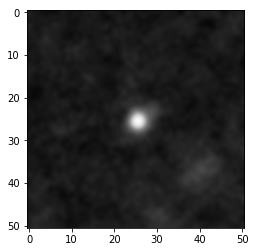

In [34]:
plt.imshow(m.mean(0), cmap='Greys_r', interpolation='bicubic')

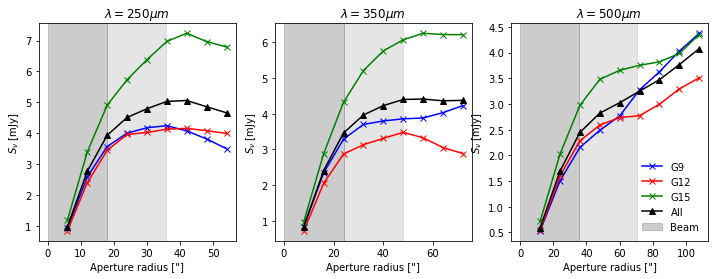

In [35]:
ph_mean = []
ph_mean2 = []
cols = {'G9':'b', 'G12':'r', 'G15':'g'}
j=1
fig = plt.figure(figsize=(12,4))
for lambda_ in lambdas:
    plt.subplot(1,3,j)
    plt.title(r'$\lambda=%d \mu m$ ' %lambda_)
    
    for patch in patches:
        for i in xrange(1,rmax+1):
            ph_mean.append(GetPhotometryFromStacks(lambda_, patch, i, remove_mean=True, remove_max=True))
#             ph_mean.append(GetPhotometryFromStacks(lambda_, patch, i, r_in=3*psf[lambda_]/reso[lambda_], r_out=4*psf[lambda_]/reso[lambda_], remove_mean=False, remove_max=True))
        plt.plot(reso[lambda_]*np.arange(1,rmax+1), ph_mean,'-x', label=patch, color=cols[patch])
        ph_mean = []
        ph_mean2 = []
          
    for i in xrange(1,rmax+1):
        ph_mean2.append(GetTotPhotometryFromStacks(lambda_, i, remove_mean=True, remove_max=True))
#         ph_mean2.append(GetTotPhotometryFromStacks(lambda_, i, r_in=3*psf[lambda_]/reso[lambda_], r_out=4*psf[lambda_]/reso[lambda_], remove_mean=False, remove_max=True))
    
    plt.plot(reso[lambda_]*np.arange(1,rmax+1), ph_mean2,'-^', label='All', color='k')

    plt.axvspan(0, psf[lambda_], alpha=0.4, color='grey', label=r'Beam')
    plt.axvspan(psf[lambda_], 2*psf[lambda_], alpha=0.2, color='grey')
#     plt.ylim([0,12])
#     plt.xlim([0,100])
    plt.xlabel('Aperture radius ["]')
    plt.ylabel(r'$S_{\nu}$ [mJy]')
    j=j+1
plt.legend(loc='best',frameon=False)
    

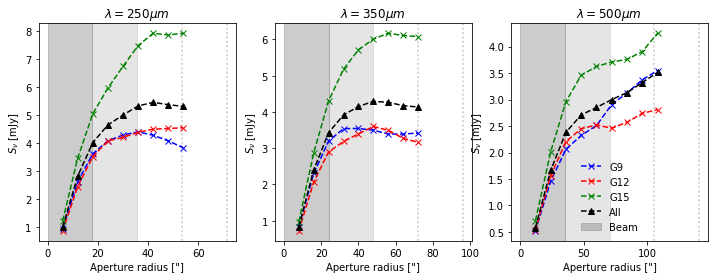

In [36]:
ph_mean = []
ph_mean2 = []
cols = {'G9':'b', 'G12':'r', 'G15':'g'}
j=1
fig = plt.figure(figsize=(12,4))
for lambda_ in lambdas:
    plt.subplot(1,3,j)
    plt.title(r'$\lambda=%d \mu m$ ' %lambda_)
    
    for patch in patches:
        for i in xrange(1,rmax+1):
            ph_mean.append(GetPhotometryFromStacks(lambda_, patch, i, r_in=3*psf[lambda_]/reso[lambda_], r_out=4*psf[lambda_]/reso[lambda_], remove_mean=False, remove_max=True))
        plt.plot(reso[lambda_]*np.arange(1,rmax+1), ph_mean,'--x', label=patch, color=cols[patch])
        ph_mean = []
        ph_mean2 = []
          
    for i in xrange(1,rmax+1):
        ph_mean2.append(GetTotPhotometryFromStacks(lambda_, i, r_in=3*psf[lambda_]/reso[lambda_], r_out=4*psf[lambda_]/reso[lambda_], remove_mean=False, remove_max=True))
    
    plt.plot(reso[lambda_]*np.arange(1,rmax+1), ph_mean2,'--^', label='All', color='k')

    plt.axvspan(0, psf[lambda_], alpha=0.4, color='grey', label=r'Beam')
    plt.axvspan(psf[lambda_], 2*psf[lambda_], alpha=0.2, color='grey')
    plt.axvline(3*psf[lambda_], ls=':', alpha=0.2, color='k')
    plt.axvline(4*psf[lambda_], ls=':', alpha=0.2, color='k')
#     plt.ylim([0,12])
#     plt.xlim([0,100])
    plt.xlabel('Aperture radius ["]')
    plt.ylabel(r'$S_{\nu}$ [mJy]')
    j=j+1
plt.legend(loc='best',frameon=False)
    

213.097067074
658.682263677
988.778182198
1135.41278852
1152.75141838
1148.86358261
1141.79115123
1116.09219841
1133.35117808
1161.44166194
1182.40760344
1200.88684837
1234.94199177
1267.58787899
1250.27658754
1284.24090315
1298.69697464
1292.00891951
1352.32791035


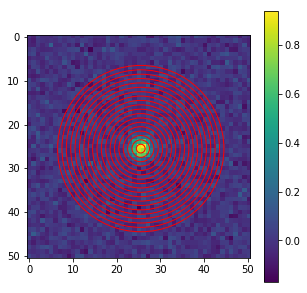

In [37]:
myf = lambda x,y : np.exp(-((x-25.5)**2+(y-25.5)**2)/5.) 

def Integrate2D(mat, lambda_, r, remove_mean=True, remove_max=0):
    apertures = CircularAperture(positions[lambda_], r=r)
    phot_table = aperture_photometry(mat/(factor[lambda_])/1e-3, apertures)
    return phot_table.field('aperture_sum')[0]

    
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)

y, x = np.meshgrid(np.arange(boxsize[250]), np.arange(boxsize[250]))

noise = np.random.randn(boxsize[250]**2).reshape((boxsize[250],boxsize[250]))/20

plt.imshow(myf(y,x)+noise)
plt.colorbar()
    
for i in xrange(1,20):
    print Integrate2D(myf(y,x)+noise-np.mean(noise),250,i, remove_mean=True, remove_max=10)
    circin = plt.Circle(positions[250], radius=i, color='r', fill=False)
    ax.add_patch(circin)
plt.show()

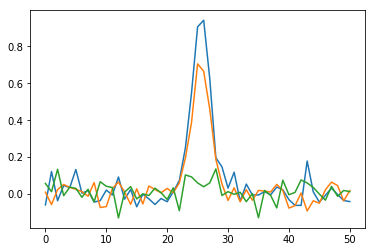

In [38]:
plt.plot((myf(y,x)+noise-np.mean(noise))[25,:])
plt.plot((myf(y,x)+noise-np.mean(noise))[27,:])
plt.plot((myf(y,x)+noise-np.mean(noise))[22,:])

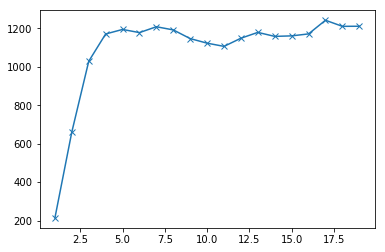

In [50]:
ap = [214.075481931,
660.904988112,
1028.28400199,
1170.21422911,
1193.8014571,
1177.42627346,
1207.80845415,
1191.39370903,
1146.2151797,
1122.47636564,
1105.79820232,
1148.20345292,
1178.50935665,
1157.72858365,
1160.40885181,
1170.62274084,
1241.6456938,
1209.99910506,
1210.43858576]

plt.plot(np.arange(1,len(ap)+1), ap, '-x')

In [56]:
nsim = 10000
flux = np.zeros(nsim)
for i in xrange(nsim):
    noise_ = np.random.randn(boxsize[250]**2).reshape((boxsize[250],boxsize[250]))/20
    apertures = CircularAperture(positions[250], r=5)
    phot_table = aperture_photometry(noise_, apertures)
    flux[i] = phot_table.field('aperture_sum')[0]

(0.0038738291865088852, 0.0021171422679109875, -0.42034232652530218)

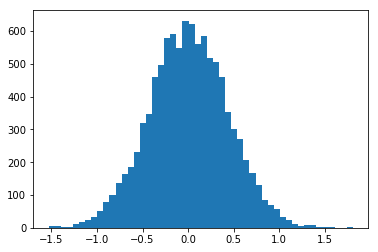

In [71]:
plt.hist(flux, bins=50);
np.mean(flux),np.percentile(flux,50), np.percentile(flux,16)

In [73]:
sims[350]['G12'].shape

(2925, 39, 39)

In [74]:
39/2.

19.5